In [1]:
#from sympy import *
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math

sy.init_printing()

The second command makes sure that formulas are presented in a graphical way, if
possible. Then, we generate a symbol and define the integrand:

In [2]:
x = sy.symbols('x') #Python object of type Symbol
#f1 = sy.Lambda(x, (x**2)) # SymPy Lambda function
f1 = sy.lambdify(x, (x**2), "numpy")
#f2 = sy.Lambda(x, (4*x)) # SymPy Lambda function
f2 = sy.lambdify(x, (4*x), "numpy")
display(f1)
display(f2)

<function _lambdifygenerated(x)>

<function _lambdifygenerated(x)>

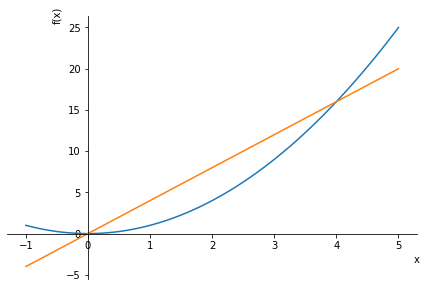

In [3]:
p_range = (x,-1,5)
p = sy.plot(f1(x), f2(x), p_range, show=True)

Now we start with the symbolic computation of the integral:

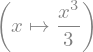

In [4]:
if1 = sy.Lambda(x, sy.integrate(f1(x),x))
if2 = sy.Lambda(x, sy.integrate(f2(x),x))
display(if1)
display(if2)

## Poiščemo presečišče krivulj

In [5]:
presecisca = sy.solve(f1(x) - f2(x), x)
print(f'najdena presecisca so {presecisca}')

najdena presecisca so [0, 4]


## narišemo iskane pološčine

[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]
[ 0.          0.19753086  0.79012346  1.77777778  3.16049383  4.9382716
  7.11111111  9.67901235 12.64197531 16.        ]


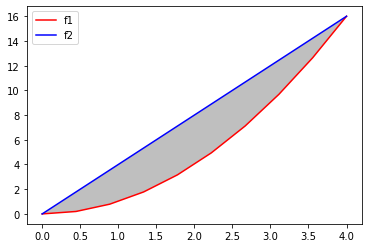

In [6]:
#x = symbols('x')
#f = sin(x)

x_array = np.linspace(0, 4, 10)
f1_array = f1(x_array)
f2_array = f2(x_array)


print(x_array)
print(f1_array)
#f_array = sy.lambdify(x, f)(x_array)

fig, ax = plt.subplots()

ax.plot(x_array, f1_array, color = 'r', label='f1')
ax.plot(x_array, f2_array, color = 'b', label='f2')

ax.fill_between(x_array, f1_array, f2_array, facecolor = 'grey', alpha = 0.5)

ax.legend()
plt.show()

## Izračunamo ploščino med krivuljama s uporabo določenega integrala

surface = definite integral in range x -> 0, 4

In [8]:
s1 = if1(4) - if1(0)
s2 = if2(4) - if2(0)

print(f'ploščina med abciso in krivuljo je {s1}, med abciso in premico pa {s2}')

# ker je premica nad krivuljo, ima večjo površino in odštevamo od nje
s = s2 - s1
print(f'ploščina med krivuljama med x=0 in x=4 je {s}')

ploščina med abciso in krivuljo je 64/3, med abciso in premico pa 32
ploščina med krivuljama med x=0 in x=4 je 32/3
